# Berpikir dengan peluang

In [1]:
import pandas as pd
import numpy as np
import dc_stat_think as dcst
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
sns.set()
%matplotlib inline

In [6]:
len(iris)

150

In [7]:
pertama_50, kedua_50, ketiga_50 = (np.random.permutation(iris['petal_length'].values)[0:50],
                                   np.random.permutation(iris['petal_length'].values)[0:50], 
                                   np.random.permutation(iris['petal_length'].values)[0:50])

Text(0,0.5,'ECDF')

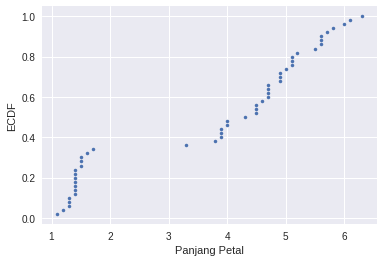

In [8]:
plt.plot(*dcst.ecdf(pertama_50), marker='.', linestyle='none')
plt.xlabel('Panjang Petal')
plt.ylabel('ECDF')

Text(0,0.5,'ECDF')

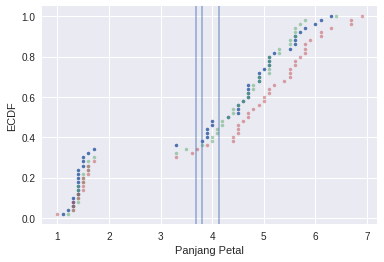

In [10]:
plt.plot(*dcst.ecdf(pertama_50), marker='.', linestyle='none')
plt.plot(*dcst.ecdf(kedua_50), marker='.', linestyle='none',alpha=0.5)
plt.plot(*dcst.ecdf(ketiga_50), marker='.', linestyle='none', alpha=0.5)
plt.axvline(np.mean(pertama_50), alpha=0.5)
plt.axvline(np.mean(kedua_50), alpha=0.5)
plt.axvline(np.mean(ketiga_50), alpha=0.5)
plt.xlabel('Panjang Petal')
plt.ylabel('ECDF')

Text(0,0.5,'ECDF')

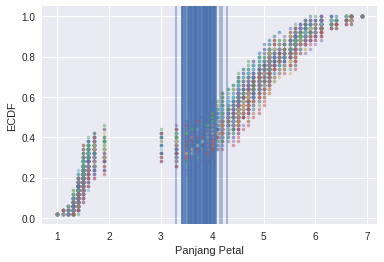

In [12]:
for _ in range(100):
    data = np.random.permutation(iris['petal_length'].values)[0:50]
    plt.plot(*dcst.ecdf(data), marker='.', linestyle='none',alpha=0.5)
    plt.axvline(np.mean(data), alpha=0.5)
plt.xlabel('Panjang Petal')
plt.ylabel('ECDF')
    

# Remember Hacker Statistics ?

In [13]:
np.random.random()

0.5197142371694928

In [14]:
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848])

In [15]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False], dtype=bool)

In [16]:
np.sum(heads)

1

## Simulasi 4 Koin

In [17]:
n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1



In [18]:
n_all_heads / 10000

0.0619

- Bagaimana mensimulasikan data
- Mengulanginya berulang kali
- Menggunakan peluang peluang untuk mengaproksimasi dari hasil yang ada

# Cerita dalam Probabilitas: Distribusi Binomial

- Peluang distribusi: Sebuah deskripsi matematika dari hasil yang ada

Binomial: Jumlah r sukses dari n percobaan bernoulli dengan tingkat peluang berhasil p, adalah terdistribusi secara binomial

In [50]:
np.random.binomial(4, 0.5)

1

In [51]:
np.random.binomial(4, 0.5, size=10)

array([1, 1, 2, 2, 1, 3, 2, 3, 3, 1])

In [52]:
samples = np.random.binomial(60, 0.1, size=10000)

([<matplotlib.axis.XTick at 0x7f37bf19b9b0>,
 <a list of 10 Text xticklabel objects>)

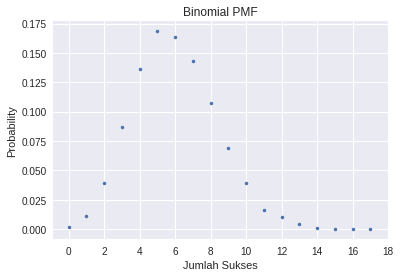

In [86]:
plt.plot(pd.Series(samples).value_counts() / len(pd.Series(samples)), marker='.', linestyle='none')

plt.xlabel('Jumlah Sukses')
plt.ylabel('Probability')
plt.title('Binomial PMF')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

Text(0.5,1,'Binomial CDF')

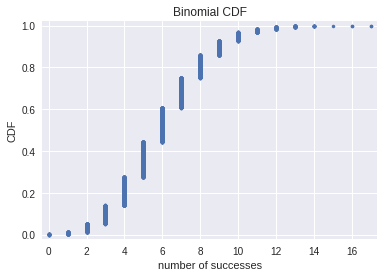

In [99]:
x, y = dcst.ecdf(samples)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.title('Binomial CDF')

# Cerita dalam Probabilitas: Distribusi Poisson

In [19]:
np.random.poisson(4)

2

In [20]:
np.random.poisson(4, size=10)

array([7, 3, 5, 4, 4, 7, 1, 6, 3, 3])

In [21]:
samples_poisson = np.random.poisson(6, size=10000)

TypeError: poisson() got multiple values for keyword argument 'size'

([<matplotlib.axis.XTick at 0x7f37bf1e3470>,
 <a list of 10 Text xticklabel objects>)

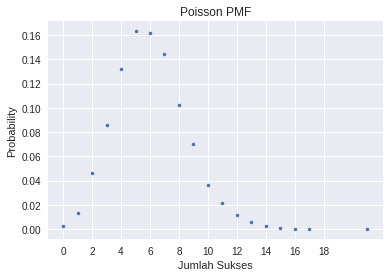

In [94]:
plt.plot(pd.Series(samples_poisson).value_counts() / len(pd.Series(samples_poisson)),
         marker='.', linestyle='none')
plt.xlabel('Jumlah Sukses')
plt.ylabel('Probability')
plt.title('Poisson PMF')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

Text(0.5,1,'Poisson CDF')

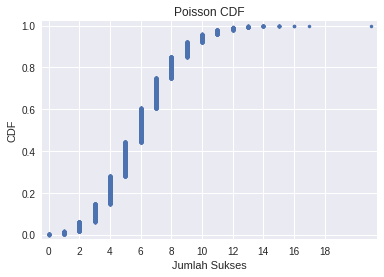

In [97]:
x_poi, y_poi = dcst.ecdf(samples_poisson)
plt.plot(x_poi, y_poi, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Jumlah Sukses')
plt.ylabel('CDF')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
plt.title('Poisson CDF')